In [64]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the data in a pandas DataFrame

In [4]:
df = pd.read_csv('DataFinal.csv', sep=';', header=0)
df

,WrongProj,All 1NN correct,All 2NN correct,All 3NN correct,All 4NN correct,#1-NN wrong,#up-to-4-NN wrong,DateTime,Timestamp,#Queries,#PointsInTreeReal,#PointsInTreeWanted,VectorSize,TimeKernel,TimeHost,Speedup,SpeedupNaiveHost,SpeedupNaiveKernel
0,0,1,1,1,1,0,0,Fri Aug 26 16:57:42 2022,1661525862,1,100,100,32,0.983444,0.709213,0.721152,0.047439,0.034210
1,0,1,1,1,1,0,0,Fri Aug 26 16:57:42 2022,1661525862,1,100,100,32,0.943238,0.672092,0.712537,0.051057,0.036380
2,0,1,1,1,1,0,0,Fri Aug 26 16:57:43 2022,1661525863,1,100,100,32,0.896198,0.656223,0.732230,0.057758,0.042292
3,0,1,1,1,1,0,0,Fri Aug 26 16:57:43 2022,1661525863,1,100,100,128,1.006500,0.592707,0.588880,0.140540,0.082761
4,0,1,1,1,1,0,0,Fri Aug 26 16:57:44 2022,1661525864,1,100,100,128,0.925373,0.656406,0.709342,0.121652,0.086293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,3,1,1,1,1,0,0,Fri Aug 26 20:06:53 2022,1661537213,8192,2000,2000,512,20325.900000,67123.100000,3.302350,0.792391,2.616750
356,6,1,1,1,1,0,0,Fri Aug 26 20:10:39 2022,1661537439,8192,1996,2000,512,20278.100000,68220.900000,3.364260,0.725982,2.442400
357,68,1,1,1,1,0,0,Fri Aug 26 20:15:08 2022,1661537708,8192,2000,2000,1024,20054.300000,66358.600000,3.308950,1.392890,4.608990
358,65,1,1,1,1,0,0,Fri Aug 26 20:19:49 2022,1661537989,8192,2000,2000,1024,20119.300000,66584.800000,3.309500,1.576980,5.219030


In [100]:
(df["Timestamp"].max()-df["Timestamp"].min())/60/60


3.4430555555555555

## Compute the precision

In [47]:
nn1_precision = (df["#Queries"].sum()-df["#1-NN wrong"].sum())/df["#Queries"].sum()
print("NN1-Precision: "+str(nn1_precision))
print(str(df["#1-NN wrong"].sum())+"/"+str(df["#Queries"].sum())+" failed queries")

points_wanted_diff = df["#PointsInTreeWanted"] - df["#PointsInTreeReal"]
points_wanted_diff_perc = df["#PointsInTreeReal"]/df["#PointsInTreeWanted"]*100
print()
print("Difference between wanted points in data structure and points actually in the datastrucure")
print("max:",points_wanted_diff.max(),"| mean:",points_wanted_diff.mean(),"| min %:",points_wanted_diff_perc.min(), "| mean %:",points_wanted_diff_perc.mean())
print("% full",)

print()
proj_precision = ((df["VectorSize"]*df["#Queries"]).sum()-df["WrongProj"].sum())/(df["VectorSize"]*df["#Queries"]).sum()
print("Precision of projection (1e-05):",proj_precision )
print(df["WrongProj"].sum(),"/",(df["VectorSize"]*df["#Queries"]).sum(),"'wrong' projections")

NN1-Precision: 1.0
0/837180 failed queries

Difference between wanted points in data structure and points actually in the datastrucure
max: 36 | mean: 0.9111111111111111 | min %: 96.6 | mean %: 99.94
% full

Precision of projection (1e-05): 0.9999950135833371
1770 / 354964320 'wrong' projections


## Speedup

In [63]:
print("Max speedup (Host vs Kernel):",df["Speedup"].max())
print("Mean speedup (Host vs Kernel):",df["Speedup"].mean())
print(df["Speedup"].describe())
print()
print("Max speedup (Naive vs Kernel):",df["SpeedupNaiveKernel"].max())
print("Mean speedup (Naive vs Kernel):",df["SpeedupNaiveKernel"].mean())
print(df["SpeedupNaiveKernel"].describe())


Max speedup (Host vs Kernel): 3.36426
Mean speedup (Host vs Kernel): 2.6021912916666667
count    360.000000
mean       2.602191
std        0.781832
min        0.588880
25%        2.260420
50%        2.910630
75%        3.175170
max        3.364260
Name: Speedup, dtype: float64

Max speedup (Naive vs Kernel): 5.21903
Mean speedup (Naive vs Kernel): 1.324945425555556
count    360.000000
mean       1.324945
std        1.348585
min        0.034210
25%        0.247441
50%        0.657198
75%        2.078385
max        5.219030
Name: SpeedupNaiveKernel, dtype: float64


Fixing vector size = 32

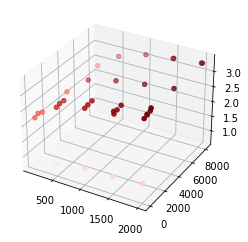

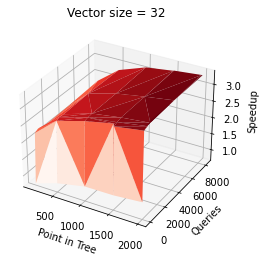

In [71]:
v32 = df.loc[df['VectorSize']==32].groupby(['#PointsInTreeReal','#Queries','VectorSize'], as_index=False).mean()

ax = plt.axes(projection='3d')
zdata = v32['Speedup']
xdata = v32['#PointsInTreeReal']
ydata = v32['#Queries']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Reds');

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('Point in Tree')
ax.set_ylabel('Queries')
ax.set_zlabel('Speedup')
ax.set_title('Vector size = 32')
ax.plot_trisurf(xdata, ydata, zdata, cmap='Reds');
plt.show()

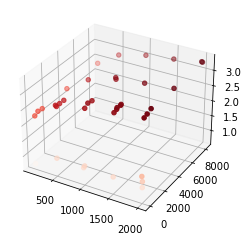

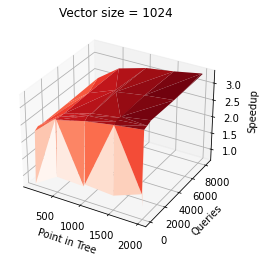

In [72]:
v32 = df.loc[df['VectorSize']==1024].groupby(['#PointsInTreeReal','#Queries','VectorSize'], as_index=False).mean()

ax = plt.axes(projection='3d')
zdata = v32['Speedup']
xdata = v32['#PointsInTreeReal']
ydata = v32['#Queries']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Reds');

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('Point in Tree')
ax.set_ylabel('Queries')
ax.set_zlabel('Speedup')
ax.set_title('Vector size = 1024')
ax.plot_trisurf(xdata, ydata, zdata, cmap='Reds');
plt.show()

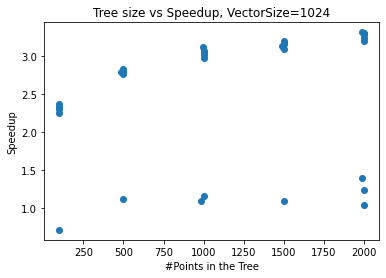

In [89]:
v32 = df.loc[df['VectorSize']==1024].groupby(['#PointsInTreeReal','#Queries','VectorSize'], as_index=False).mean()

ax = plt.axes()
zdata = v32['Speedup']
xdata = v32['#PointsInTreeReal']
ydata = v32['#Queries']
ax.set_title("Tree size vs Speedup, VectorSize=1024")
ax.set_xlabel("#Points in the Tree")
ax.set_ylabel("Speedup")
ax.scatter(xdata, zdata);


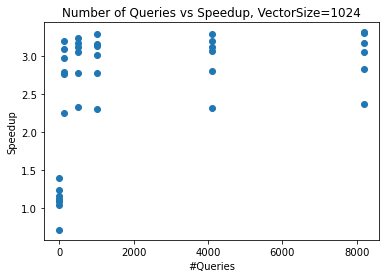

In [95]:
v32 = df.loc[df['VectorSize']==1024].groupby(['#PointsInTreeReal','#Queries','VectorSize'], as_index=False).mean()

ax = plt.axes()
zdata = v32['Speedup']
xdata = v32['#PointsInTreeReal']
ydata = v32['#Queries']
ax.set_title("Number of Queries vs Speedup, VectorSize=1024")
ax.set_xlabel("#Queries")
ax.set_ylabel("Speedup")
ax.scatter(ydata, zdata);
